In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler


In [2]:
heartdf = pd.read_csv('heart.csv')

In [3]:
print(heartdf.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB
None


In [4]:
print(heartdf.describe())

              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.9051

In [5]:
print(heartdf['target'].value_counts()) #no big class imbalance

1    165
0    138
Name: target, dtype: int64


In [6]:
print(heartdf.corr())

               age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.098447 -0.068653  0.279351  0.213678  0.121308   
sex      -0.098447  1.000000 -0.049353 -0.056769 -0.197912  0.045032   
cp       -0.068653 -0.049353  1.000000  0.047608 -0.076904  0.094444   
trestbps  0.279351 -0.056769  0.047608  1.000000  0.123174  0.177531   
chol      0.213678 -0.197912 -0.076904  0.123174  1.000000  0.013294   
fbs       0.121308  0.045032  0.094444  0.177531  0.013294  1.000000   
restecg  -0.116211 -0.058196  0.044421 -0.114103 -0.151040 -0.084189   
thalach  -0.398522 -0.044020  0.295762 -0.046698 -0.009940 -0.008567   
exang     0.096801  0.141664 -0.394280  0.067616  0.067023  0.025665   
oldpeak   0.210013  0.096093 -0.149230  0.193216  0.053952  0.005747   
slope    -0.168814 -0.030711  0.119717 -0.121475 -0.004038 -0.059894   
ca        0.276326  0.118261 -0.181053  0.101389  0.070511  0.137979   
thal      0.068001  0.210041 -0.161736  0.062210  0.098803 -0.03

In [20]:
heartdf.corr().to_csv('HeartCorrelations.csv')

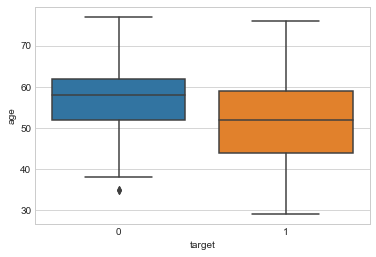

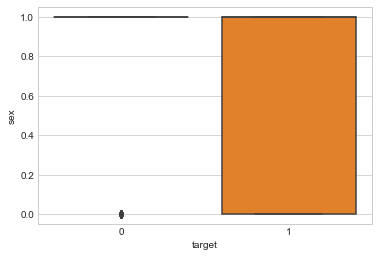

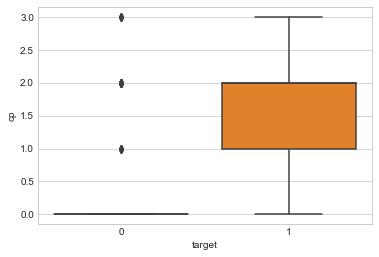

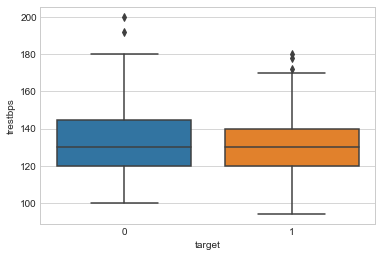

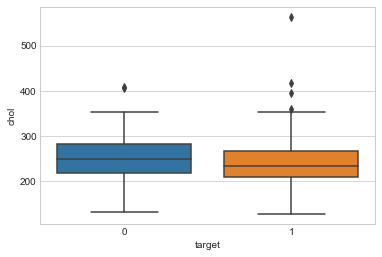

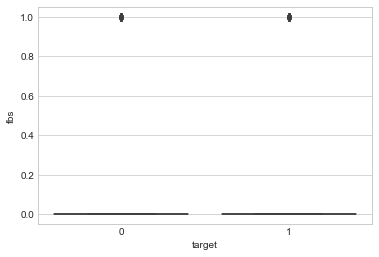

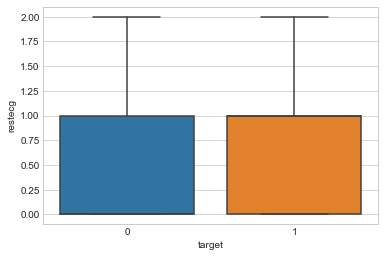

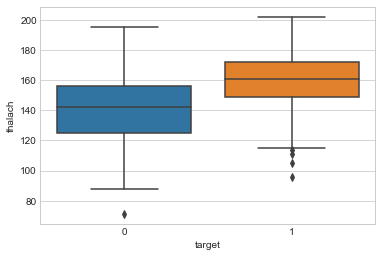

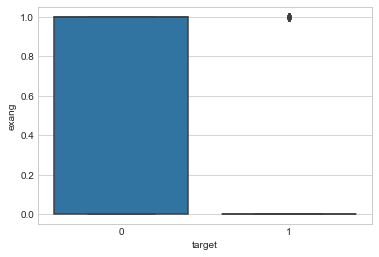

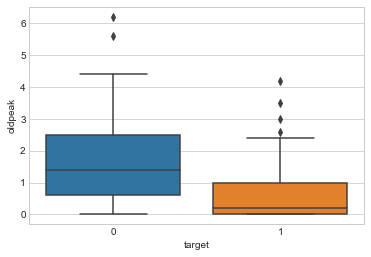

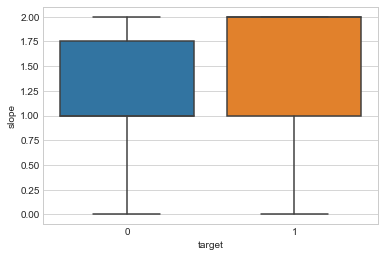

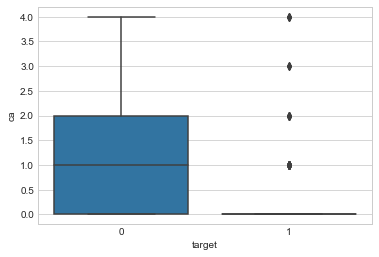

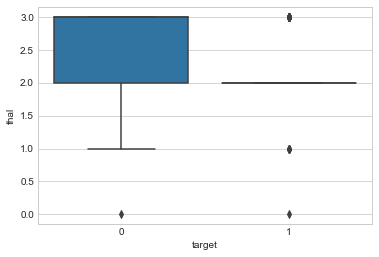

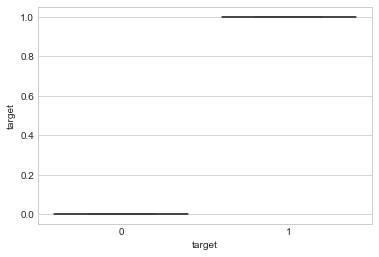

In [7]:


def plot_box(dataframe, target_col, cols):
    for col in cols: 
        sns.set_style("whitegrid")
        sns.boxplot(x = target_col, y = col , data = heartdf)
        plt.show()
        
columns = heartdf.columns
target_col = "target"
plot_box(heartdf,  target_col, columns )
    

In [14]:
#heartfeatures = heartdf.drop('target', axis = 1 )
heartfeatures = heartdf[['age', 'oldpeak', 'ca', 'slope', 'cp']]
hearttarget = heartdf[['target']]
print(heartfeatures.columns)

Index([u'age', u'oldpeak', u'slope', u'cp'], dtype='object')


In [15]:
X_train, X_test, y_train, y_test = train_test_split(heartfeatures, hearttarget, test_size = .3 )


In [16]:
logistic = linear_model.LogisticRegression()
C = [.01,.1,1,10,100]
hyperparameter = {"C":C}
regr_cv =  GridSearchCV(logistic, hyperparameter, cv=5)
regr_cv.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.01, 0.1, 1, 10, 100]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [17]:
print("Tuned Logistic Regressor Parameters: {}".format(regr_cv.best_params_))
print("Best Score is: {}".format(regr_cv.best_score_))

Tuned Logistic Regressor Parameters: {'C': 1}
Best Score is: 0.792452830189


In [19]:
print(logistic.coef_)

AttributeError: 'LogisticRegression' object has no attribute 'coef_'